# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Here is a helping code that will download and unzip the dataset for you.
# # Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [3]:
df= pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'],index_col='date_time')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [5]:
df.sample(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-07-06 10:00:00,4153.0,296.34,0.0,0.0,40,Rain,light rain
2017-12-06 17:00:00,5196.0,265.02,0.0,0.0,90,Snow,light snow
2017-04-15 02:00:00,542.0,286.69,0.0,0.0,90,Thunderstorm,thunderstorm with light rain
2017-04-21 10:00:00,4729.0,282.20,0.0,0.0,1,Clear,sky is clear
2018-08-04 03:00:00,362.0,294.72,0.0,0.0,1,Clear,sky is clear
2017-04-05 01:00:00,426.0,277.79,0.0,0.0,1,Clear,sky is clear
2018-06-09 11:00:00,4085.0,293.72,0.0,0.0,90,Rain,light rain
2017-05-24 04:00:00,875.0,281.65,0.0,0.0,40,Clouds,scattered clouds
2016-12-25 10:00:00,1823.0,273.75,0.0,0.0,90,Mist,mist


In [6]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear
2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds
2018-05-31 18:00:00,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


<Axes: xlabel='date_time'>

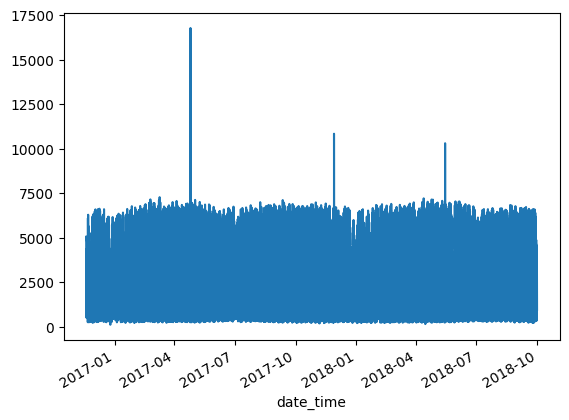

In [8]:
df['traffic_volume'].plot()

In [9]:
df.isnull().sum()

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
dtype: int64

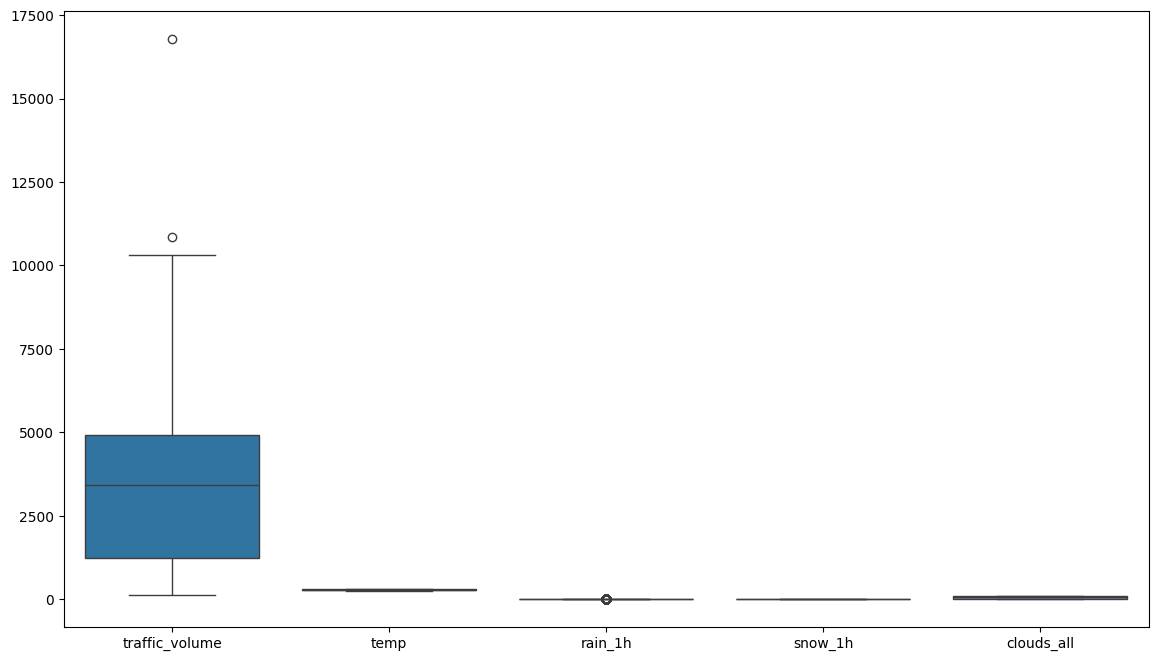

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [11]:
df['rolling_traffic_volume'] = df['traffic_volume'].rolling(window=3).mean()
df['ema_traffic_volume'] = df['traffic_volume'].ewm(span=3, adjust=False).mean()

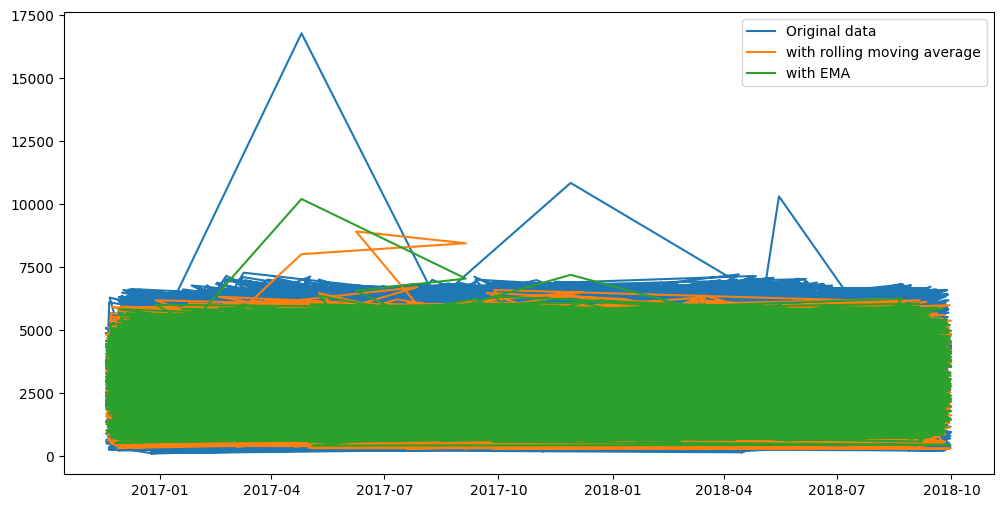

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['traffic_volume'], label='Original data')
plt.plot(df['rolling_traffic_volume'], label='with rolling moving average')
plt.plot(df['ema_traffic_volume'], label='with EMA')
plt.legend()
plt.show()

In [13]:
df.sort_index(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [14]:
df['Prev_traffic_volume'] = df['traffic_volume'].shift(1)
df['Prev_traffic_volume'].fillna(method='bfill', inplace=True)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,rolling_traffic_volume,ema_traffic_volume,Prev_traffic_volume
date_time,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4056.000000,4429.437827,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3613.666667,3750.392445,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,3742.000000,4571.716323,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4587.000000,4343.888140,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,2832.666667,3695.555774,5074.0


In [15]:
df['Day of the week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day of the year'] = df.index.dayofyear
df['IsWeekend'] = df.index.dayofweek >=5
df.head(1)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,rolling_traffic_volume,ema_traffic_volume,Prev_traffic_volume,Day of the week,Month,Day of the year,IsWeekend
date_time,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4056.0,4429.437827,4872.0,4,11,323,False


In [16]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()
df.head(6)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,rolling_traffic_volume,ema_traffic_volume,Prev_traffic_volume,Day of the week,Month,Day of the year,IsWeekend,diff_traffic_volume
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4056.000000,4429.437827,4872.0,4,11,323,False,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3613.666667,3750.392445,4872.0,4,11,323,False,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,3742.000000,4571.716323,4872.0,4,11,323,False,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4587.000000,4343.888140,4872.0,4,11,323,False,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,2832.666667,3695.555774,5074.0,4,11,323,False,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,2921.333333,3652.910160,5074.0,4,11,323,False,0.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [17]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'rolling_traffic_volume',
       'ema_traffic_volume', 'Prev_traffic_volume', 'Day of the week', 'Month',
       'Day of the year', 'IsWeekend', 'diff_traffic_volume'],
      dtype='object')

In [18]:
df2= df[['temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description',
       'ema_traffic_volume','Day of the week', 'Month', # Removed extra indent here
       'Day of the year', 'IsWeekend']]
df2

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ema_traffic_volume,Day of the week,Month,Day of the year,IsWeekend
date_time,,,,,,,,,,,
2016-11-18 15:00:00,274.08,0.0,0.0,90,Snow,heavy snow,4429.437827,4,11,323,False
2016-11-18 15:00:00,274.08,0.0,0.0,90,Fog,fog,3750.392445,4,11,323,False
2016-11-18 15:00:00,274.08,0.0,0.0,90,Mist,mist,4571.716323,4,11,323,False
2016-11-18 16:00:00,273.84,0.0,0.0,90,Fog,fog,4343.888140,4,11,323,False
2016-11-18 16:00:00,273.84,0.0,0.0,90,Mist,mist,3695.555774,4,11,323,False
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,Clouds,broken clouds,3548.915324,6,9,273,True
2018-09-30 20:00:00,282.76,0.0,0.0,90,Clouds,overcast clouds,2277.635173,6,9,273,True
2018-09-30 21:00:00,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,3781.265670,6,9,273,True


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 20000 non-null  float64
 1   rain_1h              20000 non-null  float64
 2   snow_1h              20000 non-null  float64
 3   clouds_all           20000 non-null  int64  
 4   weather_main         20000 non-null  object 
 5   weather_description  20000 non-null  object 
 6   ema_traffic_volume   20000 non-null  float64
 7   Day of the week      20000 non-null  int32  
 8   Month                20000 non-null  int32  
 9   Day of the year      20000 non-null  int32  
 10  IsWeekend            20000 non-null  bool   
dtypes: bool(1), float64(4), int32(3), int64(1), object(2)
memory usage: 1.5+ MB


In [20]:
train = df.loc['2016-11-18':'2016-12-30']
val = df.loc['2017-01-15':'2017-12-30']
test = df.loc['2018-01-01':'2018-09-30']

features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'ema_traffic_volume', 'Day of the week', 'Month', 'Day of the year', 'IsWeekend']
X_train = train[features]
y_train = train['traffic_volume']
X_val = val[features]
y_val = val['traffic_volume']
X_test = test[features]
y_test = test['traffic_volume']


In [21]:
train.isnull().sum()

traffic_volume            1
temp                      0
rain_1h                   0
snow_1h                   0
clouds_all                0
weather_main              0
weather_description       0
rolling_traffic_volume    4
ema_traffic_volume        0
Prev_traffic_volume       0
Day of the week           0
Month                     0
Day of the year           0
IsWeekend                 0
diff_traffic_volume       3
dtype: int64

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [23]:
X_train_scaled

array([[ 0.6130753 ,  0.        ,  0.        , ..., -1.33520742,
        -1.65595272, -0.6759935 ],
       [ 0.6130753 ,  0.        ,  0.        , ..., -1.33520742,
        -1.65595272, -0.6759935 ],
       [ 0.6130753 ,  0.        ,  0.        , ..., -1.33520742,
        -1.65595272, -0.6759935 ],
       ...,
       [ 0.23221844,  0.        ,  0.        , ...,  0.7489473 ,
         1.7971432 , -0.6759935 ],
       [ 0.2140824 ,  0.        ,  0.        , ...,  0.7489473 ,
         1.7971432 , -0.6759935 ],
       [ 0.17920539,  0.        ,  0.        , ...,  0.7489473 ,
         1.7971432 , -0.6759935 ]])

In [24]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[col for col in train.columns if col in X_train.columns])
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=[col for col in val.columns if col in X_val.columns])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[col for col in test.columns if col in X_test.columns])

In [25]:
X_train_scaled_df.iloc[:, 6]

0      -1.335207
1      -1.335207
2      -1.335207
3      -1.335207
4      -1.335207
          ...   
1417    0.748947
1418    0.748947
1419    0.748947
1420    0.748947
1421    0.748947
Name: Month, Length: 1422, dtype: float64

In [26]:
import tensorflow as tf
window = 160
xy_train = tf.keras.utils.timeseries_dataset_from_array(X_train_scaled_df, targets= X_train_scaled_df.iloc[window:, 0], sequence_length=window)
xy_val = tf.keras.utils.timeseries_dataset_from_array(X_val_scaled_df, targets= X_val_scaled_df.iloc[window:, 0], sequence_length=window)
xy_test = tf.keras.utils.timeseries_dataset_from_array(X_test_scaled_df, targets= X_test_scaled_df.iloc[window:, 0], sequence_length=window)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
SEED = 42
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [29]:
gru_model = Sequential([GRU(units=50, activation='tanh', return_sequences=True),
                    GRU(units=70, activation='tanh', return_sequences=True),
                    GRU(units=90, activation='tanh', return_sequences=True),
                    GRU(units=100, activation='tanh', return_sequences=True),
                    GRU(units=150, activation='tanh', return_sequences=False),
                    Dense(units=64, activation='relu'),
                    Dense(units=2, activation='relu')])

gru_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

check_gru = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/ex pract/best_gru.keras',monitor="val_loss", save_best_only=True)
history=gru_model.fit(xy_train, validation_data=xy_val, epochs=10, batch_size=32)

Epoch 1/10
10/10 [==============================] - 29s 494ms/step - loss: 1.0310 - mae: 0.8154 - val_loss: 1.9989 - val_mae: 1.1403
Epoch 2/10
10/10 [==============================] - 3s 328ms/step - loss: 1.0640 - mae: 0.7927 - val_loss: 4.7700 - val_mae: 1.8255
Epoch 3/10
10/10 [==============================] - 2s 236ms/step - loss: 1.0160 - mae: 0.7823 - val_loss: 3.2426 - val_mae: 1.4671
Epoch 4/10
10/10 [==============================] - 3s 335ms/step - loss: 0.8481 - mae: 0.6372 - val_loss: 1.4341 - val_mae: 0.9751
Epoch 5/10
10/10 [==============================] - 2s 229ms/step - loss: 0.8847 - mae: 0.6791 - val_loss: 5.0884 - val_mae: 1.9002
Epoch 6/10
10/10 [==============================] - 2s 263ms/step - loss: 0.9229 - mae: 0.7147 - val_loss: 3.6226 - val_mae: 1.5696
Epoch 7/10
10/10 [==============================] - 3s 350ms/step - loss: 0.8080 - mae: 0.6093 - val_loss: 1.8181 - val_mae: 1.0841
Epoch 8/10
10/10 [==============================] - 3s 331ms/step - loss: 0

In [30]:
gru_model.evaluate(xy_val)

79/79 [==============================] - 2s 29ms/step - loss: 2.5553 - mae: 1.2955


[2.5553390979766846, 1.2954844236373901]

In [31]:
X_val, y_val = next(iter(xy_val))
X_val.shape, y_val.shape

(TensorShape([128, 160, 9]), TensorShape([128]))

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [32]:
y_pred_v = gru_model.predict(xy_val)
y_pred_v

79/79 [==============================] - 4s 23ms/step


array([[0.62240565, 0.6391017 ],
       [0.6217326 , 0.6384792 ],
       [0.6211939 , 0.63801825],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [33]:
history.history

{'loss': [1.0310059785842896,
  1.0639897584915161,
  1.0159990787506104,
  0.8481027483940125,
  0.8846962451934814,
  0.9228998422622681,
  0.8079527616500854,
  0.8137608170509338,
  0.7858101725578308,
  0.769687294960022],
 'mae': [0.8153666257858276,
  0.7926835417747498,
  0.7822627425193787,
  0.6371820569038391,
  0.6790556907653809,
  0.7146708965301514,
  0.6092993021011353,
  0.6243420839309692,
  0.5776036381721497,
  0.5437756776809692],
 'val_loss': [1.9988607168197632,
  4.770021915435791,
  3.2425830364227295,
  1.4341436624526978,
  5.088433742523193,
  3.622591972351074,
  1.818066954612732,
  2.508074998855591,
  2.7204599380493164,
  2.5553390979766846],
 'val_mae': [1.1403112411499023,
  1.8254704475402832,
  1.4670947790145874,
  0.9751318097114563,
  1.900242805480957,
  1.569558024406433,
  1.0840656757354736,
  1.2819664478302002,
  1.3397184610366821,
  1.2954844236373901]}

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

<Axes: >

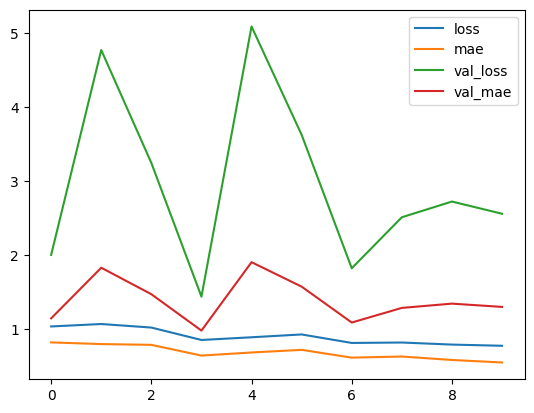

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
import numpy as np

features = []
values = []

for batch in xy_test:
  x, y = batch
  features.append(x.numpy())
  values.append(y.numpy())

features = np.concatenate(features, axis=0)
values = np.concatenate(values, axis=0)

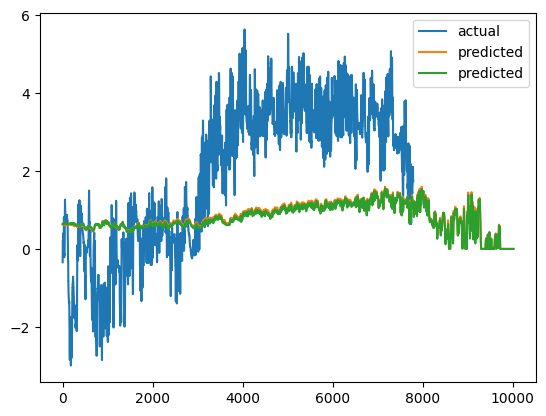

In [37]:
plt.plot(values, label='actual')
plt.plot(y_pred_v, label='predicted')
plt.legend()
plt.show()

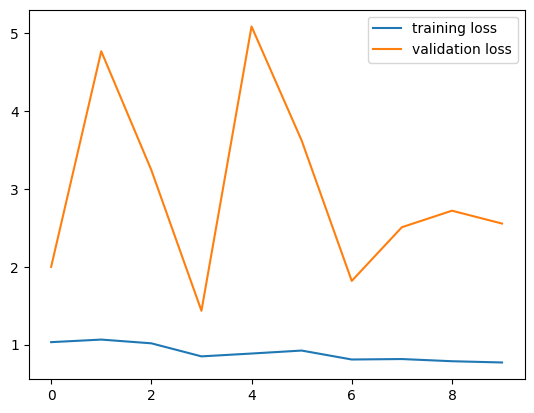

In [38]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [39]:

#multilayer LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
lstm_model = Sequential([LSTM(units=50, activation='tanh', return_sequences=True),
                    LSTM(units=70, activation='tanh', return_sequences=True),
                    LSTM(units=90, activation='tanh', return_sequences=True),
                    LSTM(units=100, activation='tanh', return_sequences=True),
                   LSTM(units=150, activation='tanh', return_sequences=False),
                    Dense(units=64, activation='relu'),
          Dense(units=1, activation='relu')]) # Remove extra indentation here


lstm_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# fit - Use train_Xy (with capital X)
history=lstm_model.fit(xy_train, validation_data=xy_val, epochs=10, batch_size=1024)



Epoch 1/10
10/10 [==============================] - 15s 436ms/step - loss: 1.0973 - mae: 0.8648 - val_loss: 5.4186 - val_mae: 1.9628
Epoch 2/10
10/10 [==============================] - 2s 247ms/step - loss: 1.1025 - mae: 0.8354 - val_loss: 1.5388 - val_mae: 1.0350
Epoch 3/10
10/10 [==============================] - 6s 624ms/step - loss: 1.0441 - mae: 0.8023 - val_loss: 5.2217 - val_mae: 1.9219
Epoch 4/10
10/10 [==============================] - 2s 265ms/step - loss: 1.0556 - mae: 0.8381 - val_loss: 3.6066 - val_mae: 1.5566
Epoch 5/10
10/10 [==============================] - 2s 260ms/step - loss: 0.8990 - mae: 0.6991 - val_loss: 1.7607 - val_mae: 1.0911
Epoch 6/10
10/10 [==============================] - 2s 268ms/step - loss: 1.1971 - mae: 0.8796 - val_loss: 4.7706 - val_mae: 1.8226
Epoch 7/10
10/10 [==============================] - 3s 339ms/step - loss: 1.0082 - mae: 0.8031 - val_loss: 4.4504 - val_mae: 1.7523
Epoch 8/10
10/10 [==============================] - 3s 359ms/step - loss: 0

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [40]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
sequence_length = 24  #
test_generator = TimeseriesGenerator(X_test_scaled_df, y_test, length=sequence_length, batch_size=1)
lstm_predictions = lstm_model.predict(test_generator)
lstm_predictions = np.concatenate(lstm_predictions, axis=0)

7925/7925 [==============================] - 53s 6ms/step


In [41]:
import pandas as pd

# Convert predictions to a DataFrame if you prefer
predictions_df = pd.DataFrame(lstm_predictions, columns=['Predicted'])

# Save predictions to a CSV file
predictions_df.to_csv('lstm_predictions.csv', index=False)

# Optionally, you can also save predictions as a NumPy array
np.save('lstm_predictions.npy', lstm_predictions)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [42]:
lstm_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [43]:
check_lstm = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/ex pract/best_lstm.keras',monitor="val_loss", save_best_only=True)

In [44]:
lstm_hist = lstm_model.fit(xy_train, epochs=10, validation_data=xy_val, callbacks=[check_lstm])

Epoch 1/10
10/10 [==============================] - 14s 597ms/step - loss: 0.8559 - mse: 0.8559 - val_loss: 2.9510 - val_mse: 2.9510
Epoch 2/10
10/10 [==============================] - 3s 347ms/step - loss: 0.8502 - mse: 0.8502 - val_loss: 2.9103 - val_mse: 2.9103
Epoch 3/10
10/10 [==============================] - 2s 247ms/step - loss: 0.8491 - mse: 0.8491 - val_loss: 2.9438 - val_mse: 2.9438
Epoch 4/10
10/10 [==============================] - 2s 256ms/step - loss: 0.8474 - mse: 0.8474 - val_loss: 2.9690 - val_mse: 2.9690
Epoch 5/10
10/10 [==============================] - 4s 392ms/step - loss: 0.8458 - mse: 0.8458 - val_loss: 2.9702 - val_mse: 2.9702
Epoch 6/10
10/10 [==============================] - 3s 282ms/step - loss: 0.8443 - mse: 0.8443 - val_loss: 2.9706 - val_mse: 2.9706
Epoch 7/10
10/10 [==============================] - 3s 282ms/step - loss: 0.8427 - mse: 0.8427 - val_loss: 2.9856 - val_mse: 2.9856
Epoch 8/10
10/10 [==============================] - 3s 339ms/step - loss: 0

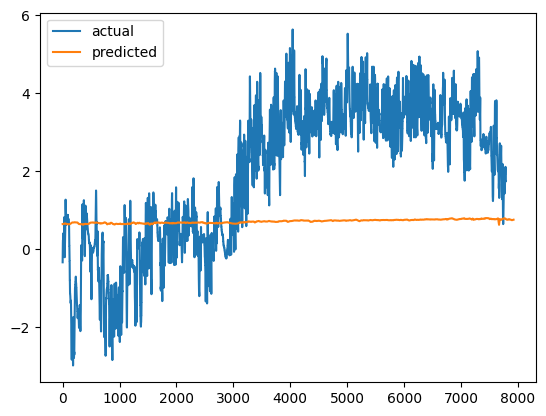

In [45]:
plt.plot(values, label='actual')
plt.plot(lstm_predictions, label='predicted')
plt.legend()
plt.show()

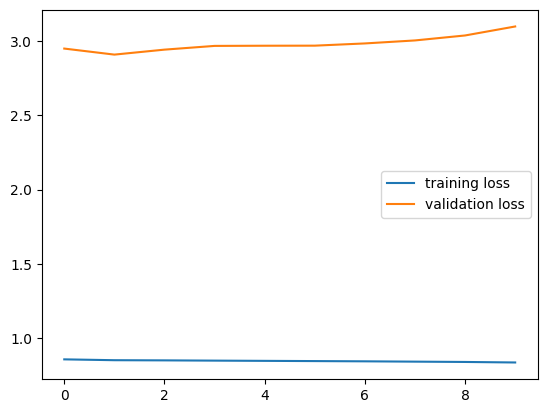

In [46]:
plt.plot(lstm_hist.history['loss'], label='training loss')
plt.plot(lstm_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: